#### 🔍Problématique métier

Nous définirons comme objectif de notre projet de répondre à la question suivante :

**"En se basant sur les films du passé et leur notation par les spectateurs, peut-on prédire le succès d'un film futur à l'aide de modèles de Machine Learning ?"**

🎯Pour cela, nous avons à notre disposition 4 possibilités de variable cible :
* *Popularity*
* *Vote_Count*
* *Vote_Average*
* Un *KPI* personnalisé utilisant tout ou partie de ces variables.

Des analyses ultérieures seront nécessaires pour définir laquelle choisir.

#### Normalisation/Standardisation

Avant de réaliser cette étape, nous devrons déterminer :

- la répartition statistique des features (notamment afin de savoir quel nombre d'entre elles s'apparentent à une loi normale, les minima, les maxima, et le taux d'outliers des différentes colonnes numériques),

- et quel modèle serait opportun pour ces données.

On pourra s'aider pour ce faire de librairies pour la Data Viz' telles que matplotlib.pyplot et Seaborn.

**Répartition statistique des features**

Nous allons déjà préparer les différentes données , ce qui implique de ne conserver pour l'instant que les variables numériques.

Le Dataframe _df_nums_ abritera ces variables pour l'analyse statistique et le formatage adéquat.

In [1]:
import pandas as pd

df = pd.read_csv("9000plus_1.csv")
df

# On supprimera la colonne "Unnamed : 0", qui correspond à l'ancien index du
# DataFrame (avant le Data Cleaning du premier Notebook)
df = df.drop(columns=['Unnamed: 0'])
df.columns

# On séparera également les données de langues et de genres dans des DataFrames
# pour des analyses spécifiques de ces catégories.

# Ces données catégorielles étant déjà binarisées, on ne leur appliquera pas de standardisation/normalisation.

# Données de genres
df_genres = pd.DataFrame(data= df[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
                                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']],
                                  index= df.index)
print("DataFrame des genres des films : \n", df_genres, end="\n\n")

# Données de langues
df_languages = pd.DataFrame(data= df[['ar', 'bn', 'ca', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 'eu',
                                     'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'la',
                                     'lv', 'ml', 'ms', 'nb', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv',
                                     'ta', 'te', 'th', 'tl', 'tr', 'uk', 'zh']],
                                     index= df.index)
print("DataFrame des langues des films : \n", df_languages, end="\n\n")

# Enfin, on créé df_nums en supprimant les données de langues et de genres.
# On ne conservera pas non plus les titres des films, qui n'apportent rien dans ce contexte.
df_nums = pd.DataFrame(data= df.iloc[:,0:7], index= df.index)
print("DataFrame des variables numériques : \n", df_nums, end="\n\n")

DataFrame des genres des films : 
       Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          1          1          0       0      0            0      0       0   
1          0          0          0       0      1            0      0       0   
2          0          0          0       0      0            0      0       0   
3          0          0          1       1      0            0      0       1   
4          1          1          0       0      0            0      0       0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
9821       0          0          0       0      1            0      1       0   
9822       0          0          0       0      0            0      0       0   
9823       0          0          0       0      0            0      0       0   
9824       0          0          0       0      0            0      1       0   
9825       0          0          0       0      0            0      1     

#### 📊Analyse Descriptive

Maintenant que nous avons séparé les variables :
* numériques,
* de langues,
* et de genres,

Nous allons analyser, notamment avec la Data Visualization, les statistiques descriptives de ces différentes variables.

En particulier, nous allons analyser les variables numériques afin de déterminer leur répartition statistique, ainsi que les modèles candidats de Machine Learning que nous pourrons utiliser pour traiter la problématique métier.

Les variables de genres et linguistiques pourront être également simplifiées en fonction de leur répartition et de leur représentativité.

en    0.770303
ja    0.065642
es    0.034500
fr    0.029717
ko    0.017301
zh    0.013128
it    0.012518
cn    0.011093
ru    0.008447
de    0.008345
pt    0.003766
da    0.002850
no    0.002646
hi    0.002646
sv    0.002341
nl    0.002137
th    0.001730
pl    0.001730
tr    0.001527
id    0.001527
tl    0.000814
te    0.000611
fi    0.000509
el    0.000509
sr    0.000509
cs    0.000407
hu    0.000305
fa    0.000305
ta    0.000204
ro    0.000204
uk    0.000204
ar    0.000204
is    0.000204
he    0.000204
nb    0.000102
ms    0.000102
ml    0.000102
la    0.000102
ca    0.000102
bn    0.000102
eu    0.000102
et    0.000102
lv    0.000102
dtype: float64 
 Drama              0.145161
Comedy             0.117517
Action             0.104141
Thriller           0.096464
Adventure          0.071844
Romance            0.057227
Horror             0.056994
Animation          0.055754
Family             0.054823
Fantasy            0.050713
Science Fiction    0.049356
Crime              0.048154
My

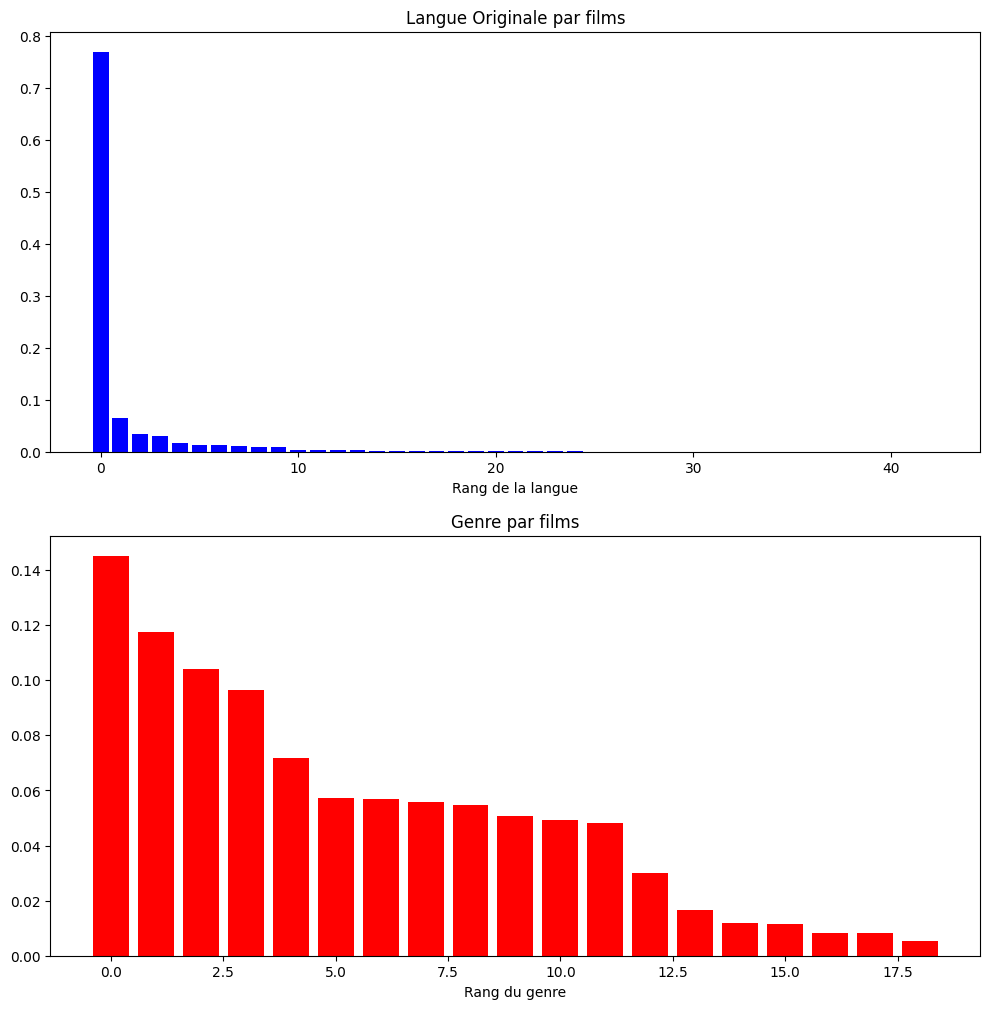

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

langugages_scores = df_languages.sum(axis=0).T
lang_sum = langugages_scores.sum(axis=0)
langugages_scores = langugages_scores.apply(lambda x : x/lang_sum).sort_values(ascending= False)

genres_scores = df_genres.sum(axis=0).T
genres_sum = genres_scores.sum(axis=0)
genres_scores = genres_scores.apply(lambda x : x/genres_sum).sort_values(ascending= False)

print(langugages_scores, "\n", genres_scores)
print("\n", "Statistiques des langues originales : ", "\n", langugages_scores.describe(), "\n")
print("\n", "Statistiques des genres : ", "\n", genres_scores.describe(), "\n")

plt.figure(figsize= (12,12))

plt.subplot(211)
plt.bar(range(len(langugages_scores)), langugages_scores, color='blue', label='Languages')
plt.title("Langue Originale par films")
plt.xlabel("Rang de la langue")

plt.subplot(212)
plt.bar(range(len(genres_scores)), genres_scores, color='red', label='Genres')
plt.title("Genre par films")
plt.xlabel("Rang du genre")

plt.show()

_Histogramme catégoriel (somme cumulative) :_

_plt.hist(df_genres, 19, density=True, histtype='step', cumulative=True, label='Genres')_

_Alternative à plt.bar :_

_sns.countplot(x)_

In [20]:
df_nums

,Popularity,Vote_Count,Vote_Average,Release_Year,Release_Month,Release_Day,Release_Weekday
0,5083.954,8940,8.3,2021,12,15,3
1,3827.658,1151,8.1,2022,3,1,2
2,2618.087,122,6.3,2022,2,25,5
3,2402.201,5076,7.7,2021,11,24,3
4,1895.511,1793,7.0,2021,12,22,3
...,...,...,...,...,...,...,...
9821,13.357,896,7.6,1973,10,15,1
9822,13.356,8,3.5,2020,10,1,4
9823,13.355,94,5.0,2016,5,6,5
9824,13.354,152,6.7,2021,3,31,3


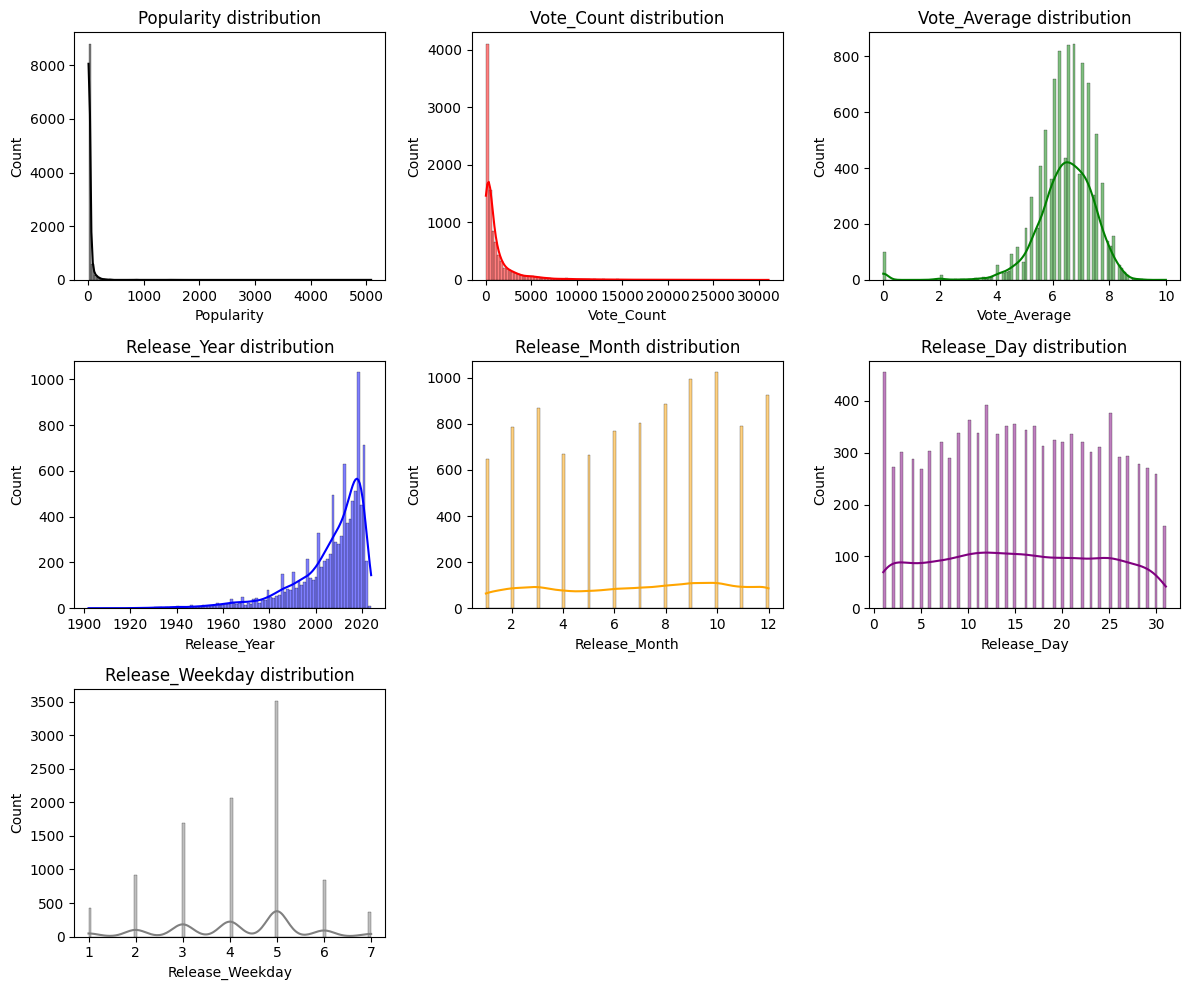

'\n# Regardons maintenant la répartition des variables numériques\n(y0, y1, y2, y3, y4, y5, y6) = (df_nums.iloc[:,i] for i in range(7))\n\nplt.subplot(331)\nsns.displot (y0, kde= True, bins =1000, color= "black")\nplt.title("Popularity distribution")\n\nplt.subplot(332)\nsns.displot (y1, kde= True, bins =1000, color= "red")\nplt.title("Vote_Count distribution")\n\nplt.subplot(333)\nsns.displot (y2, kde= True, bins =1000, color= "green")\nplt.title("Vote_Average distribution")\n\nplt.subplot(334)\nsns.displot (y3, kde= True, bins =1000, color= "blue")\nplt.title("Release_Year distribution")\n\nplt.subplot(335)\nsns.displot (y4, kde= True, bins =1000, color= "purple")\nplt.title("Release_Month distribution")\n\nplt.subplot(336)\nsns.displot (y5, kde= True, bins =1000, color= "orange")\nplt.title("Release_Day distribution")\n\nplt.subplot(337)\nsns.displot (y6, kde= True, bins =1000, color= "grey")\nplt.title("Release_Weekday distribution")\n\n\nplt.show()'

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3×3 pour les 7 variables
axes = axes.flatten()
color_list = ["black", "red", "green", "blue", "orange", "purple", "grey"]

for ((i, col), color) in zip(enumerate(df_nums.columns), color_list):
    ax = axes[i]
    sns.histplot(df_nums[col], bins=100, kde=True, ax=ax, color=color)
    ax.set_title(f"{col} distribution")

# Pour masquer les axes vides
for j in range(len(df_nums.columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# Ne mélangez pas sns.displot (figure‑level) et plt.subplot.
# Pour des subplots, préférez les fonctions axes‑level (sns.histplot, sns.kdeplot, sns.boxplot, etc.) avec l’argument ax=.
# -------------------------------------------------------------
'''
# Regardons maintenant la répartition des variables numériques
(y0, y1, y2, y3, y4, y5, y6) = (df_nums.iloc[:,i] for i in range(7))

plt.subplot(331)
sns.displot (y0, kde= True, bins =1000, color= "black")
plt.title("Popularity distribution")

plt.subplot(332)
sns.displot (y1, kde= True, bins =1000, color= "red")
plt.title("Vote_Count distribution")

plt.subplot(333)
sns.displot (y2, kde= True, bins =1000, color= "green")
plt.title("Vote_Average distribution")

plt.subplot(334)
sns.displot (y3, kde= True, bins =1000, color= "blue")
plt.title("Release_Year distribution")

plt.subplot(335)
sns.displot (y4, kde= True, bins =1000, color= "purple")
plt.title("Release_Month distribution")

plt.subplot(336)
sns.displot (y5, kde= True, bins =1000, color= "orange")
plt.title("Release_Day distribution")

plt.subplot(337)
sns.displot (y6, kde= True, bins =1000, color= "grey")
plt.title("Release_Weekday distribution")


plt.show()'''

Nous observons que l'année de distribution, la popularité et le nombre de votes ont des valeurs très concentrées aux extrémités des abscisses considérées, ce qui pourrait laisser penser que, pour y voir clair dans ces variables, la normalisation serait moins adaptée que la standardisation.

Ceci étant dit, nous observons que les trois autres variables concernant la date de sortie des films ont une fonction de distribution relativement constante, ce qui pourrait pour le coup réclamer d'avantage une normalisation des données.

Nous regarderons donc la heatmap de corrélation, en faisant particulièrement attention aux relations avec les trois variables cibles potentielles qui s'y trouvent.

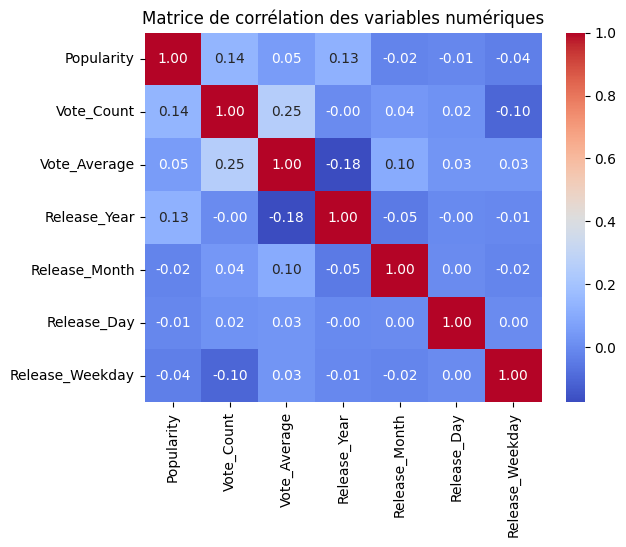

In [22]:
# Heatmap de corrélation

import seaborn as sns
import matplotlib.pyplot as plt

corr = df_nums.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

Il n'y a donc pas l'air d'y avoir de fortes corrélation (>= 0.5) entre les différentes variables observées, la corrélation la plus importante étant entre le nombre de votes et la note moyenne, avec un taux de +0.25. Cela nous indique que plus les spectateurs ont légèrement plus tendance à aller voter pour mettre une bonne note au film qu'une mauvaise note.

Néanmoins, la corrélation n'est pas suffisante pour envisager une sélection de variables ou une PCA.

Nous choisirons donc de traiter les 3 variables cycliques (Month, Day et Weekday) avec des fonctions trigonométriques, et de standardiser les autres variables (éventuellement, en utilisant le log au préalable pour Popularity et Vote_Count, étant donné leur asymétrie).

In [23]:
df_nums

,Popularity,Vote_Count,Vote_Average,Release_Year,Release_Month,Release_Day,Release_Weekday
0,5083.954,8940,8.3,2021,12,15,3
1,3827.658,1151,8.1,2022,3,1,2
2,2618.087,122,6.3,2022,2,25,5
3,2402.201,5076,7.7,2021,11,24,3
4,1895.511,1793,7.0,2021,12,22,3
...,...,...,...,...,...,...,...
9821,13.357,896,7.6,1973,10,15,1
9822,13.356,8,3.5,2020,10,1,4
9823,13.355,94,5.0,2016,5,6,5
9824,13.354,152,6.7,2021,3,31,3


In [24]:
# Dans le prochain Notebook, nous déciderons du traitement des données linguistiques et
# de genres, et nous appliquerons le processus de standardisation à toutes les variables.

# Sauvegardons les DataFrames des sous-catégories en .csv séparés, plus faciles à étudier et à
# traiter séparément.

df_genres.to_csv("9000plus_genres.csv")
df_languages.to_csv("9000plus_languages.csv")
df_nums.to_csv("9000plus_nums.csv")

# Enregistrement du dataset actuel
df.to_csv("9000plus_2.csv")

In [25]:
df

,Popularity,Vote_Count,Vote_Average,Release_Year,Release_Month,Release_Day,Release_Weekday,Action,Adventure,Animation,...,ru,sr,sv,ta,te,th,tl,tr,uk,zh
0,5083.954,8940,8.3,2021,12,15,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3827.658,1151,8.1,2022,3,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2618.087,122,6.3,2022,2,25,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2402.201,5076,7.7,2021,11,24,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1895.511,1793,7.0,2021,12,22,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,13.357,896,7.6,1973,10,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9822,13.356,8,3.5,2020,10,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9823,13.355,94,5.0,2016,5,6,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9824,13.354,152,6.7,2021,3,31,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Reste du pipeline :

📊 Étape 5 : Normalisation / standardisation (si besoin pour modèles)
python
Copier
Modifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Vote_Scaled"] = scaler.fit_transform(df[["Vote_Average"]])
🧱 Étape 6 : Indexation, tri, et sauvegarde
python
Copier
Modifier
df.sort_values("Release_Date", inplace=True)
df.set_index("Release_Date", inplace=True)

# Sauvegarde facultative
df.to_csv("films_preprocessed.csv")
🧪 Bonus : vérification visuelle rapide
python
Copier
Modifier
import matplotlib.pyplot as plt

# Distribution des films par année
df["Release_Year"].value_counts().sort_index().plot(kind="bar", figsize=(15,5))
plt.title("Nombre de films par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.show()